In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
from pandas.tools.plotting import autocorrelation_plot

In [2]:
dataset= pd.read_csv('AirPassengers.csv')
dataset['Month']=pd.to_datetime(dataset['Month'],infer_datetime_format=True)
indexedDataset=dataset.set_index(['Month'])
print(indexedDataset.shape)
indexedDataset.head()

(144, 1)


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


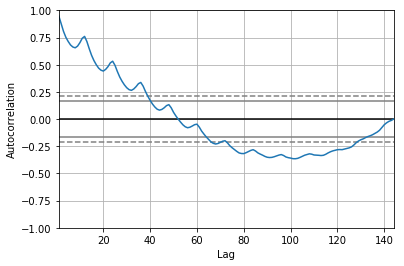

In [3]:
autocorrelation_plot(indexedDataset)
plt.show()

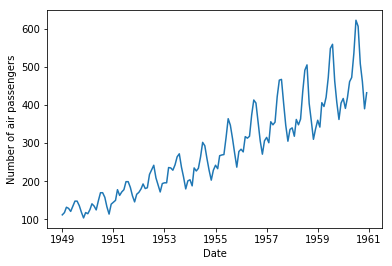

In [4]:
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(indexedDataset)

In [5]:
rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

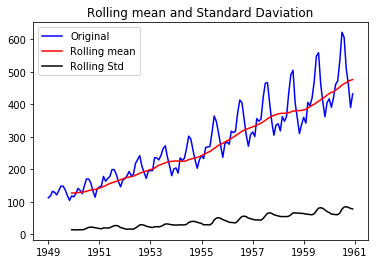

In [6]:
orig=plt.plot(indexedDataset,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling mean')
Std=plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and Standard Daviation')
plt.show()

In [7]:
print('result of Dickey fuller test:')
dftest=adfuller(indexedDataset['#Passengers'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used for ADF regression'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value    
print(dfoutput)

result of Dickey fuller test:
Test Statistic                                      0.815369
p-value                                             0.991880
#Lags Used                                         13.000000
Number of Observations Used for ADF regression    130.000000
Critical Value (1%)                                -3.481682
Critical Value (10%)                               -2.578770
Critical Value (5%)                                -2.884042
dtype: float64


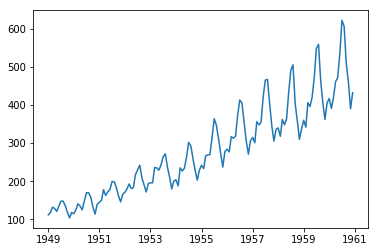

In [8]:
indexedDataset_logscale=np.log(indexedDataset)
plt.plot(indexedDataset)

# Data Transformation to achieve Stationarity

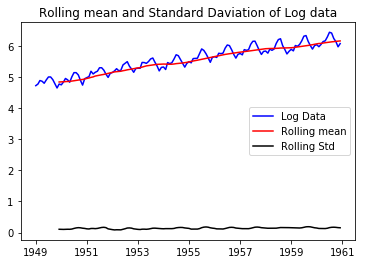

In [9]:
rolmean_log=indexedDataset_logscale.rolling(window=12).mean()
rolstd_log=indexedDataset_logscale.rolling(window=12).std()
orig_log=plt.plot(indexedDataset_logscale,color='blue',label='Log Data')
mean_log=plt.plot(rolmean_log,color='red',label='Rolling mean')
Std_log=plt.plot(rolstd_log,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and Standard Daviation of Log data')
plt.show()

            #Passengers
Month                  
1949-12-01    -0.065494
1950-01-01    -0.093449
1950-02-01    -0.007566
1950-03-01     0.099416
1950-04-01     0.052142
1950-05-01    -0.027529
1950-06-01     0.139881
1950-07-01     0.260184
1950-08-01     0.248635
1950-09-01     0.162937


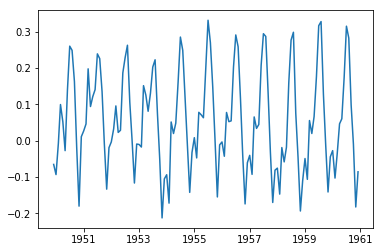

In [10]:
datasetLogScaleMinusMovingAverage=indexedDataset_logscale-rolmean_log
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
print(datasetLogScaleMinusMovingAverage.head(10))
plt.plot(datasetLogScaleMinusMovingAverage)
plt.show()

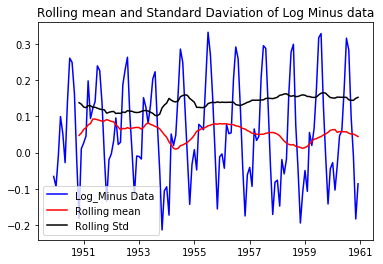

In [11]:
rolmean_log_Minus=datasetLogScaleMinusMovingAverage.rolling(window=12).mean()
rolstd_log_Minus=datasetLogScaleMinusMovingAverage.rolling(window=12).std()
orig_log_Minus=plt.plot(datasetLogScaleMinusMovingAverage,color='blue',label='Log_Minus Data')
mean_log_Minus=plt.plot(rolmean_log_Minus,color='red',label='Rolling mean')
Std_log_Minus=plt.plot(rolstd_log_Minus,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and Standard Daviation of Log Minus data')
plt.show()

In [12]:
#apply adfuller test on Subtracted data
dftest=adfuller(datasetLogScaleMinusMovingAverage['#Passengers'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Standard value','p-value','#Lag Unit','No of observations'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]=value
print(dfoutput)    

Standard value           -3.162908
p-value                   0.022235
#Lag Unit                13.000000
No of observations      119.000000
Critical value (1%)      -3.486535
Critical value (10%)     -2.579896
Critical value (5%)      -2.886151
dtype: float64


try to find a better scale than our current log.Let us try out Exponential decay.

# Exponential decay transformation

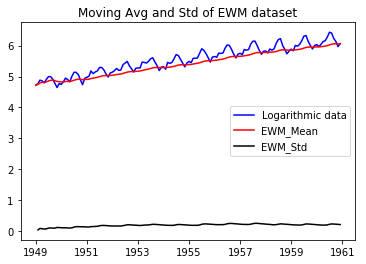

In [13]:
ExponentialWeighted_Mean=indexedDataset_logscale.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
ExponentialWeighted_Std=indexedDataset_logscale.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).std()
plt.plot(indexedDataset_logscale,color='blue',label='Logarithmic data')
plt.plot(ExponentialWeighted_Mean,color='red',label='EWM_Mean')
plt.plot(ExponentialWeighted_Std,color='black',label='EWM_Std')
plt.legend(loc='best')
plt.title('Moving Avg and Std of EWM dataset')
plt.show()

In [14]:
dataLogScaleMinusExponentialMovingAvg=indexedDataset_logscale-ExponentialWeighted_Mean
#apply adfuller test on Subtracted data
dftest=adfuller(dataLogScaleMinusExponentialMovingAvg['#Passengers'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Standard value','p-value','#Lag Unit','No of observations'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]=value
print(dfoutput)  

Standard value           -3.601262
p-value                   0.005737
#Lag Unit                13.000000
No of observations      130.000000
Critical value (1%)      -3.481682
Critical value (10%)     -2.578770
Critical value (5%)      -2.884042
dtype: float64


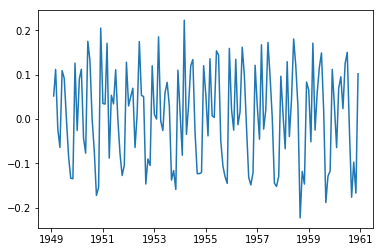

In [15]:
indexedDataset_logscaleShift=indexedDataset_logscale-indexedDataset_logscale.shift()
plt.plot(indexedDataset_logscaleShift)

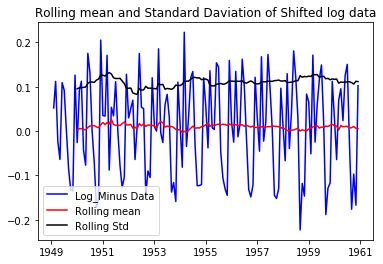

In [16]:
indexedDataset_logscaleShift.dropna(inplace=True)
rolmean_log_Shift=indexedDataset_logscaleShift.rolling(window=12).mean()
rolstd_log_Shift=indexedDataset_logscaleShift.rolling(window=12).std()
orig_log_Shift=plt.plot(indexedDataset_logscaleShift,color='blue',label='Log_Minus Data')
mean_log_Shift=plt.plot(rolmean_log_Shift,color='red',label='Rolling mean')
Std_log_Minus=plt.plot(rolstd_log_Shift,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and Standard Daviation of Shifted log data')
plt.show()

In [17]:
#apply adfuller test on Subtracted data
dftest=adfuller(indexedDataset_logscaleShift['#Passengers'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Standard value','p-value','#Lag Unit','No of observations'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]=value
print(dfoutput)

Standard value           -2.717131
p-value                   0.071121
#Lag Unit                14.000000
No of observations      128.000000
Critical value (1%)      -3.482501
Critical value (10%)     -2.578960
Critical value (5%)      -2.884398
dtype: float64


In [18]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

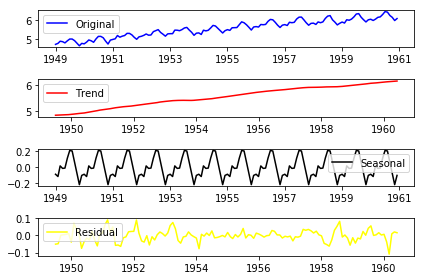

In [19]:
decomposition=seasonal_decompose(indexedDataset_logscale)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(4,1,1)
plt.plot(indexedDataset_logscale,color='blue',label='Original')
plt.legend(loc='best')

plt.subplot(4,1,2)
plt.plot(trend,color='red',label='Trend')
plt.legend(loc='best')

plt.subplot(4,1,3)
plt.plot(seasonal,color='black',label='Seasonal')
plt.legend(loc='best')

plt.subplot(4,1,4)
plt.plot(residual,color='yellow',label='Residual')
plt.legend(loc='best')

plt.tight_layout()

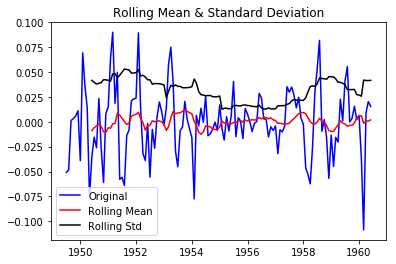

Results of Dickey Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (10%)          -2.579569e+00
Critical Value (5%)           -2.885538e+00
dtype: float64


In [20]:
residual.dropna(inplace=True)
test_stationarity(residual)

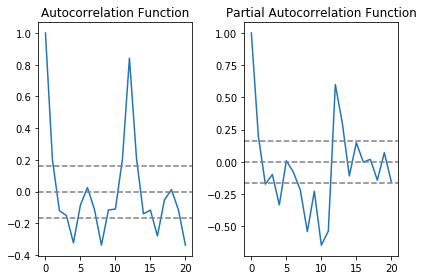

In [21]:
#ACF & PACF plots
lag_acf = acf(indexedDataset_logscaleShift, nlags=20)
lag_pacf = pacf(indexedDataset_logscaleShift, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexedDataset_logscaleShift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexedDataset_logscaleShift)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexedDataset_logscaleShift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexedDataset_logscaleShift)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            

# Building model

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted a

Plotting AR model


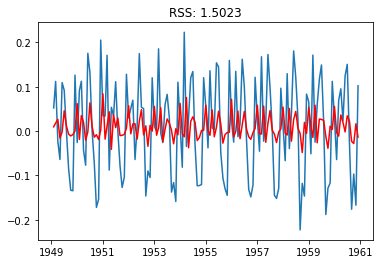

In [22]:
#AR Model
model = ARIMA(indexedDataset_logscale, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(indexedDataset_logscaleShift)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - indexedDataset_logscaleShift['#Passengers'])**2))
print('Plotting AR model')

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA model


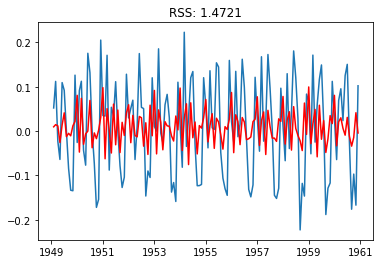

In [23]:
#MA Model
model = ARIMA(indexedDataset_logscale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(indexedDataset_logscaleShift)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - indexedDataset_logscaleShift['#Passengers'])**2))
print('Plotting MA model')

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA model


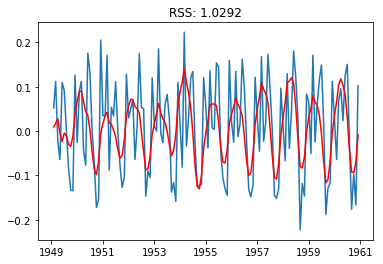

In [24]:
# AR+I+MA = ARIMA model
model = ARIMA(indexedDataset_logscale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(indexedDataset_logscaleShift)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - indexedDataset_logscaleShift['#Passengers'])**2))
print('Plotting ARIMA model')

# Prediction & Reverse transformation

In [25]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [26]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
1949-07-01    0.021984
1949-08-01    0.011007
1949-09-01   -0.018922
1949-10-01   -0.053390
1949-11-01   -0.064668
1949-12-01   -0.027456
1950-01-01    0.040679
1950-02-01    0.130113
1950-03-01    0.220143
1950-04-01    0.286294
1950-05-01    0.330348
1950-06-01    0.365815
1950-07-01    0.368915
1950-08-01    0.321787
1950-09-01    0.235435
1950-10-01    0.136969
1950-11-01    0.069123
1950-12-01    0.063896
1951-01-01    0.081281
1951-02-01    0.115296
1951-03-01    0.157858
1951-04-01    0.176605
1951-05-01    0.191865
1951-06-01    0.194354
1951-07-01    0.181946
                ...   
1958-07-01    1.166555
1958-08-01    1.150089
1958-09-01    1.070248
1958-10-01    0.987105
1958-11-01    0.928235
1958-12-01    0.925573
1959-01-01    0.956772
1959-02-01    1.008217
1959-03-01    1.088024
1959-04-01    1.153358
1959-05-01    1.211548
1959-06-01    1.247622
1959-

In [27]:
predictions_ARIMA_log = pd.Series(indexedDataset_logscale['#Passengers'].iloc[0], index=indexedDataset_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773240
1949-05-01    4.768720
dtype: float64

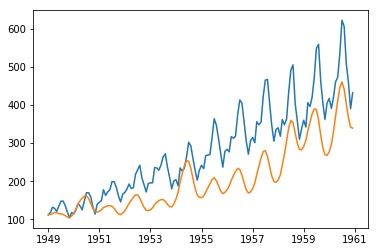

In [28]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [29]:
indexedDataset_logscale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


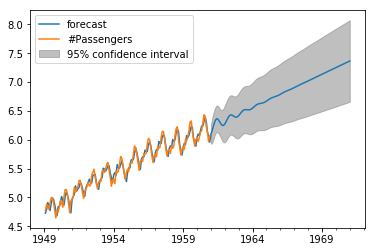

In [30]:
#We have 144(existing data of 12 yrs in months) data points. 
#And we want to forecast for additional 120 data points or 10 yrs.
results_ARIMA.plot_predict(1,264) 
x=results_ARIMA.forecast(steps=120)
plt.show()

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted a

                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -688.248
Method:                       css-mle   S.D. of innovations             29.720
Date:                Sat, 16 Mar 2019   AIC                           1390.495
Time:                        23:15:47   BIC                           1411.235
Sample:                    02-01-1949   HQIC                          1398.923
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6402      2.016      1.310      0.193      -1.311       6.592
ar.L1.D.#Passengers     0.3120      0.084      3.715      0.000       0.147       0.477
ar.L2.D.#Passeng

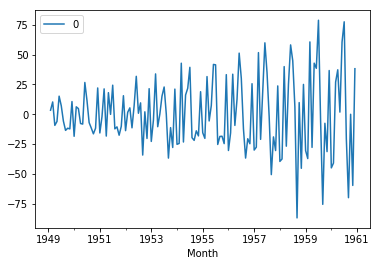

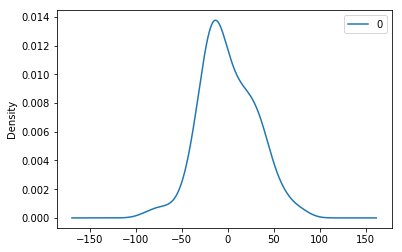

                0
count  143.000000
mean     0.010269
std     29.828334
min    -86.805620
25%    -19.916207
50%     -5.624255
75%     21.573879
max     78.697500


In [31]:
model = ARIMA(indexedDataset, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())